In this practical session, you will implement different strategies to build a recommender system.

# Dataset



We will be utilizing 'The Movie Dataset' hosted on Kaggle, featuring comprehensive metadata for 45,000 movies listed in the Full MovieLens Dataset (accessible here: [Full MovieLens Dataset](https://grouplens.org/datasets/movielens/)). The dataset encompasses films released up until July 2017 and includes a variety of data points such as cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, as well as TMDB vote counts and vote averages.

Additionally, this dataset encompasses 26 million ratings from 270,000 users across all 45,000 movies. These ratings, ranging from 1 to 5, are sourced directly from the official GroupLens website.

To access this dataset, a [Kaggle](https://www.kaggle.com/) account is required. After logging into Kaggle, navigate to your account settings and scroll to the API section to generate a new API token. This token will facilitate the direct download of the dataset via the Kaggle library in your notebook.

![Instructions for generating a Kaggle API token](https://drive.google.com/uc?export=view&id=1YcSTHD_FGrwDKaaLk6T9Gsdte8TKuPCt)

Now, you can proceed to install the Kaggle library in your notebook, which allows for the dataset to be downloaded directly.


In [3]:
!pip install kaggle

Run the next cell to upload your token.

We will begin by analyzing the metadata dataset, which includes comprehensive information about the movies.  
This dataset encompasses details such as movie titles, descriptions, genres, and even their average IMDb ratings.

In [5]:
!kaggle datasets download "rounakbanik/the-movies-dataset" -f movies_metadata.csv
!kaggle datasets download "rounakbanik/the-movies-dataset" -f ratings.csv
!unzip movies_metadata.csv.zip
!unzip ratings.csv.zip

 90%|██████████████████████████████████▎   | 11.0M/12.2M [00:00<00:00, 20.2MB/s]
100%|██████████████████████████████████████| 12.2M/12.2M [00:00<00:00, 13.4MB/s]
 99%|███████████████████████████████████████▌| 168M/170M [00:04<00:00, 44.2MB/s]
100%|████████████████████████████████████████| 170M/170M [00:04<00:00, 36.9MB/s]
Archive:  movies_metadata.csv.zip
  inflating: movies_metadata.csv     
Archive:  ratings.csv.zip
  inflating: ratings.csv             


Use pandas to explore the `movies_metadata.csv` dataset.


In [6]:
import pandas as pd
metadata = pd.read_csv('movies_metadata.csv')
metadata.dropna(subset=['title'], inplace=True)
metadata['id'] = pd.to_numeric(metadata['id'])
metadata['genres'] = metadata['genres'].apply(lambda x: [i['name'] for i in eval(x)])
metadata = metadata[['id', 'title', 'genres', 'release_date', 'vote_average', 'vote_count']]
metadata.head(5)

/var/folders/rb/3zxqg6mj6j5dywyr7zz41drh0000gn/T/ipykernel_73154/1792279430.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('movies_metadata.csv')


,id,title,genres,release_date,vote_average,vote_count
0,862,Toy Story,"[Animation, Comedy, Family]",1995-10-30,7.7,5415.0
1,8844,Jumanji,"[Adventure, Fantasy, Family]",1995-12-15,6.9,2413.0
2,15602,Grumpier Old Men,"[Romance, Comedy]",1995-12-22,6.5,92.0
3,31357,Waiting to Exhale,"[Comedy, Drama, Romance]",1995-12-22,6.1,34.0
4,11862,Father of the Bride Part II,[Comedy],1995-02-10,5.7,173.0


Using the release date, create a new column called `year` and use seaborn to plot the number of movies per year.

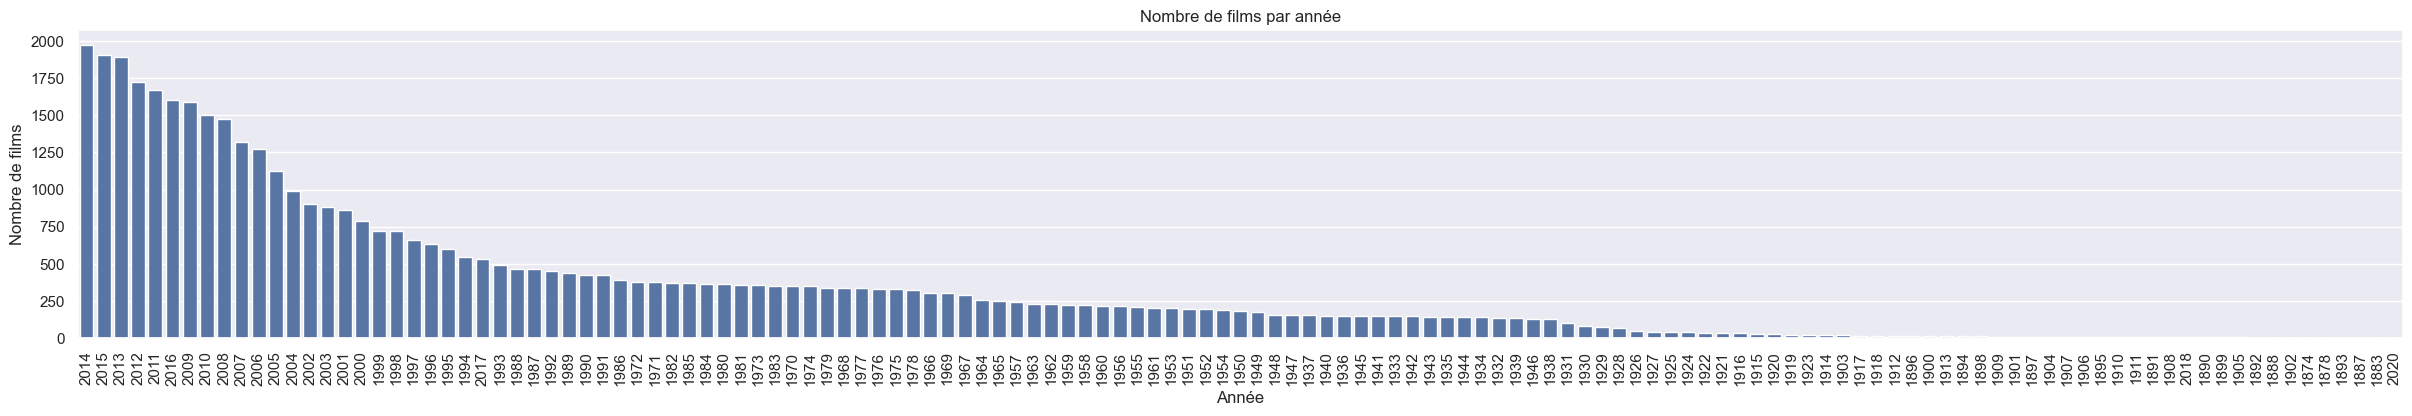

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize":(30,4)})

metadata['year'] = metadata['release_date'].str.split("-", expand=True)[0]

films_per_year = metadata.groupby('year').size().sort_values(ascending=False).reset_index(name='countFilm')


sns.barplot(x='year', y='countFilm', data=films_per_year)
plt.title('Nombre de films par année')
plt.xlabel('Année')
plt.ylabel('Nombre de films')
plt.xticks(rotation=90)
plt.show()

# Recommendation by popularity

Let's start with a straightforward approach to generating recommendations by suggesting the top 5 movies based on their average score. However, it's worth noting that while average score is a useful metric, it may not always provide the most personalized recommendations, as individual preferences can vary widely.

In [9]:
#5 meilleurs films en fonction de leur note moyenne.
min_votes = 50
filtered_movies = metadata[metadata['vote_count'] > min_votes]

Top_Five_Movies = filtered_movies.sort_values('vote_average',ascending=False).head(5)
print(Top_Five_Movies['title'])

10309                      Dilwale Dulhania Le Jayenge
39085                                     Planet Earth
7643                                Sansho the Bailiff
33420                                            Human
29183    The Jinx: The Life and Deaths of Robert Durst
Name: title, dtype: object


Have you seen any of these movies?  
You may have guessed that the average score is only reliable when it is averaged on a sufficient number of votes.
Use seaborn ```histplot``` method to plot the histogram of the number of votes.
For better readability you may first do this plot for the movies with less than 100 votes and then do another one for the remaining ones.

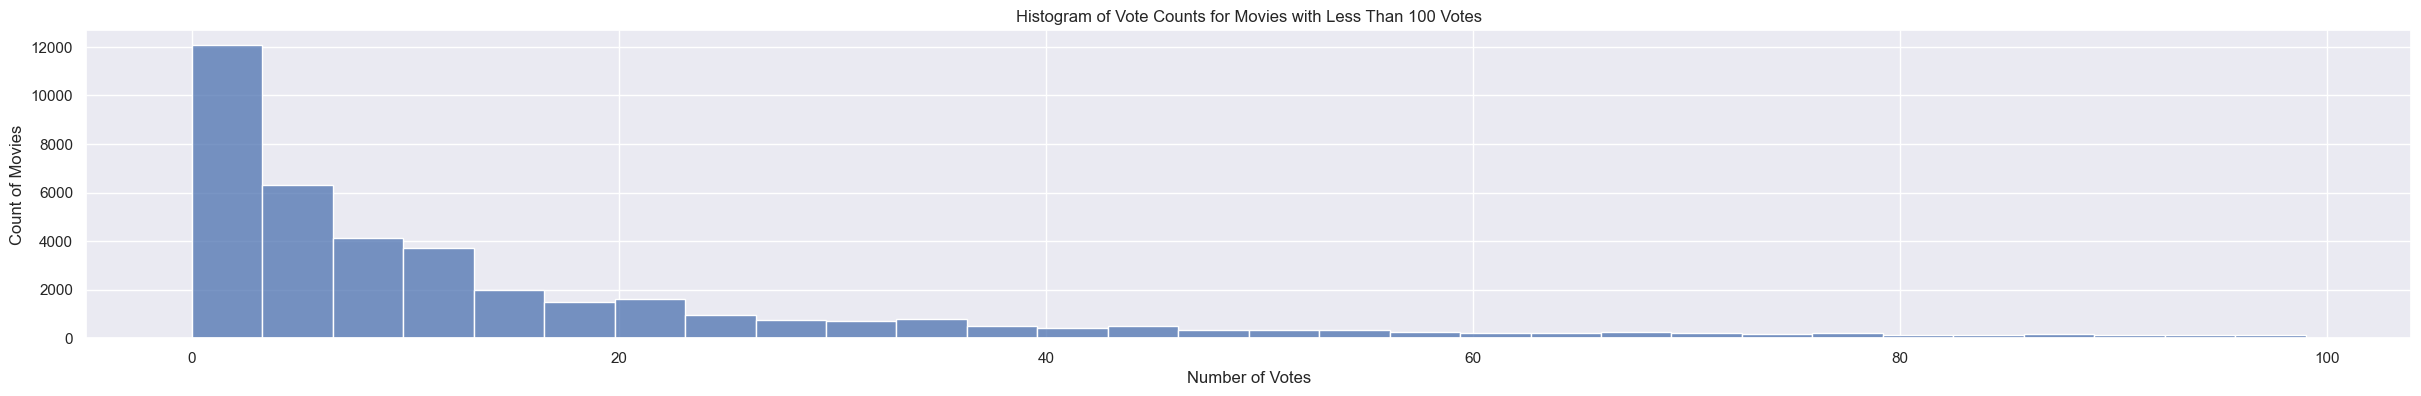

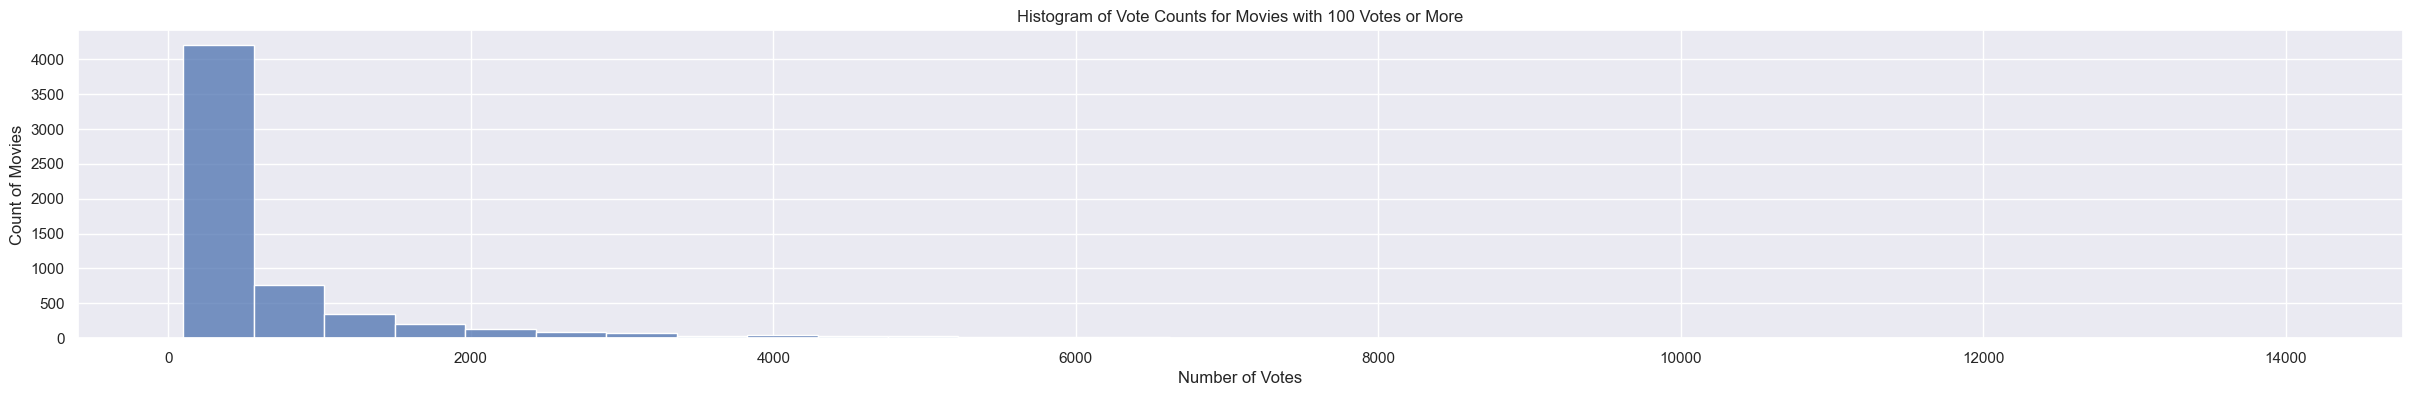

In [10]:
#Utilisez la méthode histplot Seaborn pour tracer l'histogramme du nombre de votes.
#Pour une meilleure lisibilité, vous pouvez d'abord faire cette intrigue pour les films avec moins de 100 votes,
#puis en faire une autre pour les films restants.

# Filter movies with less than 100 votes
movies_less_100_votes = metadata.query('vote_count < 100')

# Plot histogram
sns.histplot(movies_less_100_votes['vote_count'], bins=30)
plt.title('Histogram of Vote Counts for Movies with Less Than 100 Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Count of Movies')
plt.show()

# Filter movies with 100 votes or more
movies_100_more_votes = metadata.query('vote_count >= 100')

# Plot histogram
sns.histplot(movies_100_more_votes['vote_count'], bins=30)
plt.title('Histogram of Vote Counts for Movies with 100 Votes or More')
plt.xlabel('Number of Votes')
plt.ylabel('Count of Movies')
plt.show()





Try to visualize the best movies according to the average vote for movies that have at least 1000 votes.  
You should now know some of these movies now.


In [11]:

filtered_movies = metadata.query('vote_count > 1000')

Top_Movies = filtered_movies.sort_values('vote_average',ascending=False)
Top_Movies.head(10)

,id,title,genres,release_date,vote_average,vote_count,year
314,278,The Shawshank Redemption,"[Drama, Crime]",1994-09-23,8.5,8358.0,1994
40251,372058,Your Name.,"[Romance, Animation, Drama]",2016-08-26,8.5,1030.0,2016
834,238,The Godfather,"[Drama, Crime]",1972-03-14,8.5,6024.0,1972
1152,510,One Flew Over the Cuckoo's Nest,[Drama],1975-11-18,8.3,3001.0,1975
1176,539,Psycho,"[Drama, Horror, Thriller]",1960-06-16,8.3,2405.0,1960
1178,240,The Godfather: Part II,"[Drama, Crime]",1974-12-20,8.3,3418.0,1974
1184,311,Once Upon a Time in America,"[Drama, Crime]",1984-02-16,8.3,1104.0,1984
522,424,Schindler's List,"[Drama, History, War]",1993-11-29,8.3,4436.0,1993
5481,129,Spirited Away,"[Fantasy, Adventure, Animation, Family]",2001-07-20,8.3,3968.0,2001
292,680,Pulp Fiction,"[Thriller, Crime]",1994-09-10,8.3,8670.0,1994


## Best movies by IMDb score
IMDb (an acronym for Internet Movie Database) is an online database of information related to films, television programs, home videos, video games, and streaming content online.
It might be considered as one of the most exhaustive databases on movies.
In addition, IMDb maintains a ranking of movies according to people's votes. To do so, it computes a score based on the average rating and the number of votes.
The formula they are using is described [here](https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#)
![](https://drive.google.com/uc?export=view&id=12J_uJ86eOimr8Y0LHTGSMmUgkBnZu9cO)  
Use this formula to compute the IMDb score for all movies and visualize the ones with the best scores. (You may use a smaller value for m, 500 for example)


In [12]:
m = 500
c = metadata.vote_average.mean()

def imdb_score(film):
    #R = moyenne note pour le film
    #v = nombre vote pour le film
    #m = minimum de vote requis pour etre dans la liste
    #c = le vote moyen sur l'ensemble du rapport

    R = film['vote_average']
    v = film['vote_count']
    WR = (v / (v+m))* R + (m / (v+m))*c
    return WR

metadata['imdb_score'] = metadata.apply(imdb_score, axis=1)

What were the best movies in your birth year?

In [13]:
best_Movie_Birth = metadata.query('year == "2000"')
best_Movie_Birth.head(5)

,id,title,genres,release_date,vote_average,vote_count,year,imdb_score
2654,19457,The Yards,"[Drama, Action, Thriller, Crime]",2000-04-27,6.0,98.0,2000,5.680775
3060,10471,Next Friday,[Comedy],2000-01-12,6.5,145.0,2000,5.816440
3071,41276,The Life and Times of Hank Greenberg,"[Documentary, Family]",2000-01-12,4.0,2.0,2000,5.611760
3072,17908,My Dog Skip,"[Comedy, Drama, Family]",2000-01-14,6.5,71.0,2000,5.727852
3073,10384,Supernova,"[Horror, Science Fiction, Thriller]",2000-01-14,4.9,109.0,2000,5.489661


One way to refine recommendations is by considering popularity and recommending products from the same category or genre. This approach can help ensure that the suggestions are not only highly rated but also aligned with the user's interests.  
The following code will create a data frame containing one-hot encoding of the movie's genre.
Use it to recommend the best movies according to the genre and the IMDB score (for example the best Horror movies)

In [15]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genre_df = pd.DataFrame(mlb.fit_transform(metadata['genres'].fillna('[]')),columns=mlb.classes_, index=metadata.index)
metadata = pd.concat([metadata.drop(columns=['genres']), genre_df], axis=1)

metadata.head()

,id,title,release_date,vote_average,vote_count,year,imdb_score,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,862,Toy Story,1995-10-30,7.7,5415.0,1995,7.524024,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,8844,Jumanji,1995-12-15,6.9,2413.0,1995,6.679988,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,15602,Grumpier Old Men,1995-12-22,6.5,92.0,1995,5.755243,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,31357,Waiting to Exhale,1995-12-22,6.1,34.0,1995,5.648883,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,11862,Father of the Bride Part II,1995-02-10,5.7,173.0,1995,5.639233,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Recommend some horror or comedy movies.

In [ ]:
Horror_Comedy_Movies = metadata.query('Horror == 1 or Comedy == 1').sort_values('imdb_score',ascending=False)
Top_Horror_Comedy_Movies = Horror_Comedy_Movies.head(5)
Top_Horror_Comedy_Movies

,id,title,release_date,vote_average,vote_count,year,imdb_score,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
351,13,Forrest Gump,1994-07-06,8.2,8147.0,1994,8.050712,0,0,0,...,0,0,0,0,1,0,0,0,0,0
18465,77338,The Intouchables,2011-11-02,8.2,5410.0,2011,7.981574,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2211,637,Life Is Beautiful,1997-12-20,8.3,3643.0,1997,7.976347,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1176,539,Psycho,1960-06-16,8.3,2405.0,1960,7.838418,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1225,105,Back to the Future,1985-07-03,8.0,6239.0,1985,7.823283,0,1,0,...,0,0,0,0,0,1,0,0,0,0


# Content based recommender systems


### Item description
An alternative approach to building a recommender system is to generate recommendations based on content characteristics. This method is particularly appealing when dealing with situations where there are limited user interactions or a scarcity of new items to recommend. It's highly probable that your catalog includes supplementary data related to the items. This additional information is typically curated manually and can contain valuable features for the development of a content-based recommender system.

In our specific case, we will obtain a dataset that includes keywords associated with the movies to facilitate this approach.

In [16]:
!kaggle datasets download "rounakbanik/the-movies-dataset" -f keywords.csv
!unzip keywords.csv.zip

 72%|███████████████████████████▎          | 1.00M/1.39M [00:00<00:00, 1.72MB/s]
100%|██████████████████████████████████████| 1.39M/1.39M [00:00<00:00, 2.25MB/s]
Archive:  keywords.csv.zip
  inflating: keywords.csv            


In [17]:
keywords = pd.read_csv('keywords.csv')
keywords['keywords'] = keywords['keywords'].apply(lambda x: " ".join([i['name'] for i in eval(x)])).fillna('')
keywords.head()

,id,keywords
0,862,jealousy toy boy friendship friends rivalry bo...
1,8844,board game disappearance based on children's b...
2,15602,fishing best friend duringcreditsstinger old men
3,31357,based on novel interracial relationship single...
4,11862,baby midlife crisis confidence aging daughter ...


These keywords can serve as excellent descriptors for our movies.  
To enable similarity calculations between movies, it's essential to represent them in a vectorized format.  
We will now create another dataframe containing all the movies attributes.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

mlb = CountVectorizer(max_features=400)
keywords_transformed = mlb.fit_transform(keywords['keywords'])
keywords_transformed = pd.DataFrame(keywords_transformed.toarray(), columns=mlb.get_feature_names_out(), index=keywords.index)
keywords = pd.concat([keywords.drop(columns=['keywords']), keywords_transformed], axis=1)
keywords.head()

,id,1970s,3d,abuse,accident,addiction,adult,adultery,affair,africa,...,wife,witch,woman,women,world,writer,york,young,youth,zombie
0,862,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8844,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15602,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,31357,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11862,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We will proceed by constructing a dataframe in which each movie is depicted through its attribute vectors, encompassing keywords and genres.  
To optimize computational resources and reduce memory requirements, we will restrict our analysis to movies released after the year 2010.

In [19]:
subset = metadata[metadata['release_date'] > "2010"].reset_index(drop=True)

attributes_df = pd.merge(subset.drop(columns=['release_date', 'vote_average', 'vote_count', 'year',
       'imdb_score']), keywords, on='id')
attributes_df.head()

,id,title,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,wife,witch,woman,women,world,writer,york,young,youth,zombie
0,79782,Venice,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,141210,The Sleepover,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,143750,The Farmer's Wife,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,84198,A Place at the Table,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,84198,A Place at the Table,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


Now that you have a representation computed for each movie, you can calculate distances or similarities for movie pairs.  
Use scikit-learn 's [cosine_distances](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_distances.html) function, to compute the cosine similarity matrix of your dataframe.  

In [20]:
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import cosine_similarity

attributes_df_without_title = attributes_df.drop(columns=['title'])
cosine_sim = cosine_distances(attributes_df_without_title)
cosine_sim

array([[0.00000000e+00, 2.07254991e-10, 1.18304144e-10, ...,
        1.32945988e-10, 1.65800262e-10, 1.57105107e-10],
       [2.07254991e-10, 0.00000000e+00, 9.85430626e-11, ...,
        3.89622778e-11, 1.71654579e-10, 5.01498842e-11],
       [1.18304144e-10, 9.85430626e-11, 0.00000000e+00, ...,
        3.75032227e-11, 1.07287956e-10, 4.83931784e-11],
       ...,
       [1.32945988e-10, 3.89622778e-11, 3.75032227e-11, ...,
        0.00000000e+00, 1.05752962e-10, 5.65958391e-12],
       [1.65800262e-10, 1.71654579e-10, 1.07287956e-10, ...,
        1.05752962e-10, 0.00000000e+00, 1.21504695e-10],
       [1.57105107e-10, 5.01498842e-11, 4.83931784e-11, ...,
        5.65958391e-12, 1.21504695e-10, 0.00000000e+00]])

Use the following function with your similarity matrix to recommend movies from another movie title.  
Try on several movies.

In [21]:
titles = attributes_df['title']
indices = pd.Series(attributes_df.index, index=attributes_df['title'])

def get_reco(title, sim_matrix):
  idx = indices[title]
  print(f'original: {title}')
  recos = sim_matrix[idx].argsort()[1:6]
  recos = titles.iloc[recos]

  print(recos)

In [22]:
title = 'LEGO: The Adventures of Clutch Powers'
get_reco(title, cosine_sim)

original: LEGO: The Adventures of Clutch Powers
6920                 Pokémon: Zoroark: Master of Illusions
10561     Broken Blade: Book Six - Enclave of Lamentations
10560    Broken Blade: Book Five - The Horizon Between ...
10559      Broken Blade: Book Four - The Earth of Calamity
10557    Broken Blade: Book Three - The Mark of the Ass...
Name: title, dtype: object


In [23]:
title = 'Iron Man 2'
get_reco(title, cosine_sim)

original: Iron Man 2
725                             The Avengers
479                                     Thor
2058                             Planet Hulk
542                       X-Men: First Class
2399    Justice League: Crisis on Two Earths
Name: title, dtype: object


In [24]:
title = 'How to Train Your Dragon'
get_reco(title, cosine_sim)

original: How to Train Your Dragon
118                                Shrek Forever After
199      Legend of the Guardians: The Owls of Ga'Hoole
6782               Arthur 3: The War of the Two Worlds
5556                          Barbie in A Mermaid Tale
12678                                      Justin Time
Name: title, dtype: object


In [25]:
title = 'Alice in Wonderland'
get_reco(title, cosine_sim)

original: Alice in Wonderland
303    The Chronicles of Narnia: The Voyage of the Da...
35     Percy Jackson & the Olympians: The Lightning T...
60                                   Clash of the Titans
73                 LEGO: The Adventures of Clutch Powers
300                                              Beastly
Name: title, dtype: object


Let's free some memory in the Colab instance.

In [26]:
del(cosine_distances)
del(attributes_df)

### Images

Images are another type of content associated to products.  
It may not necessarily be relevant in the case of movies but let's do it anyway.  
We will now recommend movies according to their posters.  
First, we need to download another dataset.

In [27]:
!kaggle datasets download "ghrzarea/movielens-20m-posters-for-machine-learning"
!unzip movielens-20m-posters-for-machine-learning.zip

 99%|███████████████████████████████████████▊| 727M/731M [00:20<00:00, 39.8MB/s]
100%|████████████████████████████████████████| 731M/731M [00:20<00:00, 36.6MB/s]
Archive:  movielens-20m-posters-for-machine-learning.zip
  inflating: MLP-20M/MLP-20M/1.jpg   
  inflating: MLP-20M/MLP-20M/10.jpg  
  inflating: MLP-20M/MLP-20M/100.jpg  
  inflating: MLP-20M/MLP-20M/1000.jpg  
  inflating: MLP-20M/MLP-20M/100003.jpg  
  inflating: MLP-20M/MLP-20M/100006.jpg  
  inflating: MLP-20M/MLP-20M/100008.jpg  
  inflating: MLP-20M/MLP-20M/100010.jpg  
  inflating: MLP-20M/MLP-20M/100013.jpg  
  inflating: MLP-20M/MLP-20M/100015.jpg  
  inflating: MLP-20M/MLP-20M/100017.jpg  
  inflating: MLP-20M/MLP-20M/100032.jpg  
  inflating: MLP-20M/MLP-20M/100034.jpg  
  inflating: MLP-20M/MLP-20M/100036.jpg  
  inflating: MLP-20M/MLP-20M/100038.jpg  
  inflating: MLP-20M/MLP-20M/100040.jpg  
  inflating: MLP-20M/MLP-20M/100042.jpg  
  inflating: MLP-20M/MLP-20M/100044.jpg  
  inflating: MLP-20M/MLP-20M/100046.jp

The following code will help loading the data with Pytorch.

In [29]:
import torch
from torchvision import datasets

class ImageAndPathsDataset(datasets.ImageFolder):
    def __getitem__(self, index):
        img, _= super(ImageAndPathsDataset, self).__getitem__(index)
        path = self.imgs[index][0]
        return img, path



We will use a pre-trained network to extract the features from the posters.
Similar to what we did with the item descriptions, we will compute similarities between the movies according to these features.

The pre-trained model was trained with normalized images. Thus, we have to normalize our posters before feeding them to the network.
The following code instantiates a data loader with normalized images and provides a function to revert the normalization for visualization purposes.


In [47]:
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

mean = [ 0.485, 0.456, 0.406 ]
std = [ 0.229, 0.224, 0.225 ]
normalize = transforms.Normalize(mean, std)
inv_normalize = transforms.Normalize(
   mean= [-m/s for m, s in zip(mean, std)],
   std= [1/s for s in std]
)

transform = transforms.Compose([transforms.Resize((224, 224)),
                                transforms.ToTensor(),
                                normalize])
dataset = ImageAndPathsDataset('MLP-20M', transform)

dataloader = DataLoader(dataset, batch_size=128, num_workers=2, shuffle=False)

Here are some exemples of posters:

In [32]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
x, paths = next(iter(dataloader))
img_grid = make_grid(x[:16])
img_grid = inv_normalize(img_grid)
plt.figure(figsize=(20,15))
plt.imshow(img_grid.permute(1, 2, 0))
plt.axis('off')

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/hugoguilbot/anaconda3/envs/AIF/lib/python3.9/multiprocessing/spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "/Users/hugoguilbot/anaconda3/envs/AIF/lib/python3.9/multiprocessing/spawn.py", line 126, in _main
    self = reduction.pickle.load(from_parent)
AttributeError: Can't get attribute 'ImageAndPathsDataset' on <module '__main__' (built-in)>


KeyboardInterrupt: 

Instantiate a pre-trained a mobilenet_v3_small model (documentation [here](https://pytorch.org/vision/stable/models.html))

In [33]:
import torchvision.models as models
mobilenet = models.mobilenet_v3_small(weights='IMAGENET1K_V1')

Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /Users/hugoguilbot/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████| 9.83M/9.83M [00:00<00:00, 33.0MB/s]


Have a look to the model:

In [34]:
mobilenet

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

We will now crate a subset of this model to extract the features.
Use a Sequential model to get only the features followed by the avgpool layer of mobilnet and finish with a Flatten layer (```torch.nn.Flatten()```)


In [42]:
import torch.nn as nn

device = "mps" if torch.backends.mps.is_available() else "cpu"
device = torch.device(device)

model = nn.Sequential(mobilenet.features,mobilenet.avgpool,nn.Flatten())
model = model.to(device)

If your model is OK, it should predict 576-dimensional vectors.

In [44]:
import torch
x = torch.zeros(100, 3, 224,224).to(device)
y = model(x)
y.shape

torch.Size([100, 576])


We will proceed to establish a dataframe containing our extracted features, along with the file paths to the poster images..

In [52]:
from tqdm import tqdm
import pandas as pd
import torch

# Votre code pour initialiser le dataloader et le modèle ici...
# Assurez-vous que le modèle est sur le bon périphérique (MPS ou CPU)
model = model.to(device)

features_list = []
paths_list = []

# Boucle pour traiter les données du dataloader
for x, paths in tqdm(dataloader):
    with torch.no_grad():
        # Envoyer les données sur le même périphérique que le modèle
        x = x.to(device)

        # Obtenir les embeddings
        embeddings = model(x)

        # Si vous travaillez sur le GPU, ramenez les embeddings sur le CPU pour la conversion en NumPy
        embeddings = embeddings.cpu()

        # Étendre les listes de features et de chemins
        features_list.extend(embeddings.numpy())
        paths_list.extend(paths)

# Créer un DataFrame avec les features et les chemins
df = pd.DataFrame({
    'features': features_list,
    'path': paths_list
})

df.head()





Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/hugoguilbot/anaconda3/envs/AIF/lib/python3.9/multiprocessing/spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "/Users/hugoguilbot/anaconda3/envs/AIF/lib/python3.9/multiprocessing/spawn.py", line 126, in _main
    self = reduction.pickle.load(from_parent)
AttributeError: Can't get attribute 'ImageAndPathsDataset' on <module '__main__' (built-in)>
  0%|          | 0/211 [01:34<?, ?it/s]


KeyboardInterrupt: 

We will now extract all the features into a numpy array that will be used to compute the similarity matrix.

In [ ]:
import numpy as np
features = np.vstack(features_list)
features.shape

Now compute the cosine similarities between the embeddings of your movies.

In [ ]:
from sklearn.metrics.pairwise import cosine_distances
cosine_sim = cosine_distances(features)

The ```plot_image``` function  displays a poster according to it's path.  
Fill the ```plot_images``` function to plot a series of posters from a list of paths.

In [ ]:
import matplotlib.image as mpimg

def plot_image(path):
  img = mpimg.imread(path)
  plt.imshow(img)
  plt.axis('off')

def plot_images(paths_list):

    num_images = len(paths_list)
    cols = 5
    rows = num_images // cols + (num_images % cols > 0)

    plt.figure(figsize=(cols * 4, rows * 4))

    for i, path in enumerate(paths_list, 1):
        plt.subplot(rows, cols, i)
        plot_image(path)


plot_images(['MLP-20M/MLP-20M/1.jpg', 'MLP-20M/MLP-20M/2.jpg', 'MLP-20M/MLP-20M/3.jpg', 'MLP-20M/MLP-20M/4.jpg', 'MLP-20M/MLP-20M/5.jpg'])

Fill the following code to implement a function that plots the top 5 recommendations for a movie according to its index.

In [ ]:
def plot_reco(idx, sim_matrix):
  img = plot_image(df['path'][idx])
  recos = sim_matrix[idx].argsort()[1:6]
  reco_posters = []
  for r in recos:
      tmp = df['path'][r]
      reco_posters.append(tmp)

  plot_images(reco_posters)

idx = 1
plot_reco(idx, cosine_sim)

Try with different movie indexes, you will be surprised by the lack of originality of the poster designers!  
Look at [this post](https://thechive.com/2020/01/20/all-movie-posters-look-the-same-what-the-hell-is-this-sht-20-photos/) to convince yourself.

## Vector databases  

Computing the similarity matrix is a very expensive operation in terms of memory and computation time that scales quadratically with the number of items.  It is also not very practical to store this matrix in a database.  
Vector databases offer a suite of advantages tailored to the needs of modern data analytics and machine learning applications. At their core, they specialize in handling high-dimensional data, allowing for efficient similarity searches—something traditional databases struggle with. This makes them invaluable for tasks like recommendation systems, image searches, and semantic text retrieval. Beyond search efficiency, vector databases are designed for scalability, capable of handling billions of vectors without a hitch. Furthermore, they often come with built-in mechanisms for distributed storage and computation, ensuring data resilience and fast query speeds even as data volumes grow. In essence, vector databases are the backbone that empowers many of the AI-driven solutions we see today.  
For our current session, we're aiming for simplicity and efficiency. Many of the standard vector databases, like [Milvus](https://milvus.io/) or [Weaviate](https://weaviate.io/), require their own dedicated installations and often need to run on separate servers or containers.  
This can introduce added complexity. Instead, we're turning to [Annoy](https://github.com/spotify/annoy) a straightforward library developped by Spotify that lets us perform efficient neighbor searches without the installation and server overhead. While Annoy is great for our present needs, do keep in mind that in larger, production scenarios, the capabilities of a dedicated vector database could be invaluable.

In [53]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 6.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp39-cp39-macosx_11_0_arm64.whl size=56254 sha256=085c32695e7693c6634cd4bbfc3c56788c5e7edcba7b7d06773a7ea423c7772d
  Stored in directory: /Users/hugoguilbot/Library/Caches/pip/wheels/09/a9/54/37478e65995fe712f7da465749da9ddb21db6b1a599d591ac7
Successfully built annoy


We will thus use the annoy library to create a vector database with our features.  
In our case the database will be a simple file on the disk that we will load in memory when needed.
To create the database, we will use an AnnoyIndex with the same dimensionality as our features and a metric to compute the distance between vectors.  
Here we will use the cosine distance and set the database vector size to 576 (the size of our features).

In [54]:
from annoy import AnnoyIndex

dim = 576
annoy_index = AnnoyIndex(dim, 'angular')

We will now fill the database with our features as indexed vectors.

In [55]:
for i, embedding in enumerate(features):
    annoy_index.add_item(i, embedding)

annoy_index.build(10)

NameError: name 'features' is not defined

The `annoy_index.build(10)` command builds the underlying data structures required for Annoy to perform its approximate nearest neighbor searches. Specifically, the number 10 indicates that Annoy should construct 10 trees. Building multiple trees helps improve the accuracy of the search at the expense of using more memory. In essence, this command is preparing Annoy to efficiently handle future queries.

Vector databases excel at efficient similarity searches due to their foundational design principles. Traditional databases rely on exact matches or predefined indices to retrieve data. In contrast, vector databases operate in the realm of high-dimensional vector spaces. Here, data points (or vectors) that are semantically or contextually similar are often closer in distance. By leveraging algorithms optimized for these spaces, like approximate nearest neighbor (ANN) searches, vector databases quickly identify data points that lie near a query point. This spatial awareness enables them to bypass exhaustive scans and zero in on relevant results, making similarity searches both rapid and precise.
Thus querying the database for the most similar items to a given item is a very fast operation.  
Complete the following function to retrieve the most similar items to a given item.

In [56]:
def search(query_vector, k=5):
    indices = annoy_index.get_nns_by_vector(query_vector, k)
    paths = df['path'][indices]
    print(paths)
    return paths

Use this function to plot the top-k recommendations for a movie.

In [57]:
index = 600
plot_image(df.path[index])
query_vector = df.features[index]
result = search(query_vector)
plot_images(result)

NameError: name 'plot_image' is not defined

Save you database, you will need it for your project.

In [ ]:
annoy_index.save('rec_imdb.ann')

# Collaborative filtering

### Item-Item

Item-item collaborative filtering, is a form of collaborative filtering for recommender systems based on the similarity between items calculated using people's ratings.
For sake of simplicity, in this practical session, we will only focus on item-item similarity methods.
If you have time, feel free to try an user-item approach. The following [blog post](https://notebook.community/saksham/recommender-systems/Collaborative%20Filtering) may help you to do it.

We will use another dataset containing the ratings of several users on movies.

In [61]:
!wget https://raw.githubusercontent.com/wikistat/AI-Frameworks/master/RecomendationSystem/movielens_small/movies.csv
!wget https://raw.githubusercontent.com/wikistat/AI-Frameworks/master/RecomendationSystem/movielens_small/ratings.csv

--2023-11-13 17:30:04--  https://raw.githubusercontent.com/wikistat/AI-Frameworks/master/RecomendationSystem/movielens_small/movies.csv
Résolution de raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connexion à raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 494431 (483K) [text/plain]
Sauvegarde en : « movies.csv »

movies.csv          100%[===================>] 482,84K  --.-KB/s    ds 0,08s   

2023-11-13 17:30:04 (5,68 MB/s) — « movies.csv » sauvegardé [494431/494431]

--2023-11-13 17:30:05--  https://raw.githubusercontent.com/wikistat/AI-Frameworks/master/RecomendationSystem/movielens_small/ratings.csv
Résolution de raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connexion à raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443… connecté.


In [62]:
ratings = pd.read_csv('ratings.csv')
ratings = ratings.rename(columns={'movieId':'id'})
ratings['id'] = pd.to_numeric(ratings['id'])
ratings = pd.merge(ratings, metadata[['title', 'id']], on='id')[['userId', 'id', 'rating', 'title']]
ratings.head()

,userId,id,rating,title
0,1,3,4.0,Shadows in Paradise
1,6,3,5.0,Shadows in Paradise
2,19,3,3.0,Shadows in Paradise
3,32,3,3.0,Shadows in Paradise
4,42,3,4.0,Shadows in Paradise


In [63]:
ratings.shape

(42180, 4)

This dataset is a bit huge and may slow down futur computations. Moreover collaborative filtering kind of suffers from products or user with few ratings.
We will only focus on the 100 movies with the most ratings and the users with the highest number of ratings.

In [64]:
# filter movies
ratings['count'] = ratings.groupby('id').transform('count')['userId']
movieId = ratings.drop_duplicates('id').sort_values(
    'count', ascending=False).iloc[:200]['id']
ratings = ratings[ratings['id'].isin(movieId)].reset_index(drop=True)

#filter users
ratings['count'] = ratings.groupby('userId').transform('count')['id']
userId = ratings.drop_duplicates('userId').sort_values(
    'count', ascending=False).iloc[:20001]['userId']
ratings = ratings[ratings['userId'].isin(userId)].reset_index(drop=True)

ratings.shape

(20087, 5)

In [65]:
ratings.head()

,userId,id,rating,title,count
0,1,6,4.0,Judgment Night,61
1,6,6,4.0,Judgment Night,68
2,11,6,5.0,Judgment Night,28
3,18,6,4.0,Judgment Night,105
4,23,6,4.0,Judgment Night,20


In [66]:
ratings.title.unique()[:100]

array(['Judgment Night', 'Million Dollar Baby', 'Three Colors: Red',
       "Ocean's Twelve", 'Rebecca', 'Syriana', 'Stand by Me',
       'The 39 Steps', 'Terminator 3: Rise of the Machines',
       'Grill Point', 'Cockles and Muscles', 'Sissi', 'Monsoon Wedding',
       'Reservoir Dogs', 'Once Were Warriors', 'Bread and Tulips',
       'Dogville', 'The Hours', 'The Conversation', 'Solaris',
       'The Grapes of Wrath', 'Men in Black II', 'Beauty and the Beast',
       'The Passion of Joan of Arc', 'Blood: The Last Vampire',
       'Dawn of the Dead', 'Arlington Road', 'Point Break',
       'The Thirteenth Floor', 'Princesses', 'The Talented Mr. Ripley',
       'Bridge to Terabithia', 'The Dreamers', 'Houseboat', 'Parenthood',
       'Die Hard 2', 'Rope', 'Will Penny', 'The Prisoner of Zenda',
       'Fahrenheit 9/11', 'The Butterfly Effect',
       'Aguirre: The Wrath of God', 'Sister Act', 'Silent Light',
       'Say Anything...', "Mr. Holland's Opus", 'Light of Day',
       'The Go

Now, we need to build a pivot table with user in lines, movies in columns and ratings as values.  
Use pandas [pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) method to create this pivot table.

In [67]:
pivot = pd.pivot_table(ratings,values="rating", index="userId", columns="title")
pivot.head(100)

title,"20,000 Leagues Under the Sea",2001: A Space Odyssey,48 Hrs.,5 Card Stud,A Clockwork Orange,A Nightmare on Elm Street,A River Runs Through It,Aguirre: The Wrath of God,Aliens vs Predator: Requiem,All the Way Boys,...,Wag the Dog,Waiter,When Saturday Comes,Who Killed Bambi?,Will Penny,Windows on Monday,X-Men Origins: Wolverine,Y Tu Mamá También,Yesterday,Young and Innocent
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0
5,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


With this pivot table, it is now easy to compute the similarity between movies.
Indeed each movie can be represented by a vector of the users' ratings.
Instead of using a cosine similarity distance as we did earlier in the notebook, we will use the Pearson correlation score since it is already implemented in Pandas.
The pivot table has a method [```corrwith```](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corrwith.html) that will return the Pairwise correlation score of one entry with all entries of the table.

In [68]:
movie_vector = pivot["Titanic"]
similarity = pivot.corrwith(movie_vector)
similarity = similarity.sort_values(ascending=False)
print(similarity)

title
Titanic                  1.000000
The Prize                0.827479
Ringu                    0.727962
Waiter                   0.658711
Gleaming the Cube        0.642448
                           ...   
Cool Hand Luke          -0.346299
Lonely Hearts           -0.352373
Scarface                -0.391883
The Prisoner of Zenda   -0.413096
The Goddess             -0.643297
Length: 199, dtype: float64


Sort the produced results to get the best recommendations to "Titanic".
You may also try with different movies.

## Matrix factorization
Matrix factorization is certainly one of the most efficient way to build a recomender system. I really encourage you to have a look to [this article](https://datajobs.com/data-science-repo/Recommender-Systems-%5BNetflix%5D.pdf) presenting the matrix factorization techniques used in recommender systems.

The idea is pretty simple, it consists in factorizing the ratings matrix $R$ into the product of a user embedding matrix $U$ and an item embedding matrix $V$, such that $R \approx UV^\top$ with
$U = \begin{bmatrix} u_{1} \\ \hline \vdots \\ \hline u_{N} \end{bmatrix}$ and
$V = \begin{bmatrix} v_{1} \\ \hline \vdots \\ \hline v_{M} \end{bmatrix}$.

Where
- $N$ is the number of users,
- $M$ is the number of items,
- $R_{ij}$ is the rating of the $j$th item by the $i$th user,
- each row $U_i$ is a $d$-dimensional vector (embedding) representing user $i$,
- each row $V_j$ is a $d$-dimensional vector (embedding) representing item $j$,


One these emmbeding matrices are built, predicting the rating of an user $i$ for an item $j$ consists in computing the dot product $\langle U_i, V_j \rangle$.

### Using surpise

![](https://drive.google.com/uc?export=view&id=1dh2RJ95F0j-rZyuf59G35239B42veAWD)

We will begin by using the famous Singular Value Decomposition method.
Several libraries implement this algorithm.
In this session, we will be using [Surprise](http://surpriselib.com/).
Surprise is a recommender system library implemented in Python.
It was actually developed by [Nicolas Hug](http://nicolas-hug.com/about) an INSA Toulouse Alumni!

In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163494 sha256=3284ce9b58a57c7f77d3b3b0dea68037dab72b8577d9a9464b922178b3a9dc05
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


Surprise implements the SVD algorithm.  Help yourself with [the doc](https://surprise.readthedocs.io/en/stable/getting_started.html) to train an SVD model on the rating dataset.

In [75]:
#Creating a train and a test set

testset = ratings.sample(frac=0.1, replace=False)
trainset = ratings[~ratings.index.isin(testset.index)]

#assert set(testset.userId.unique()).issubset(trainset.userId.unique())
#assert set(testset.id.unique()).issubset(trainset.id.unique())

In [ ]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [ ]:
print(testset)

       userId    id  rating                            title  count
16826     186  1653     4.0           The Motorcycle Diaries     50
13023     593   339     2.0                   Night on Earth     45
8907      359  2324     5.0                      Local Color     23
6935      115  3578     5.0                       The Tunnel     39
5496       24  2028     4.0                  Say Anything...     25
...       ...   ...     ...                              ...    ...
3366        1   648     3.0             Beauty and the Beast     61
15392     596  6934     4.0                        Yesterday     54
12677      58   317     3.0  Grbavica: The Land of My Dreams     54
4879      272  1580     4.0                             Rope      6
17290     144  4973     4.0                   Under the Sand     67

[2009 rows x 5 columns]


In [ ]:
reader = Reader()
data = Dataset.load_from_df(ratings[['userId', 'id', 'rating']].fillna(0), reader)
svd = SVD()

# Run 5-fold cross-validation and print results.
cross_validate(svd, data, measures=["RMSE", "MAE"], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8410  0.8542  0.8499  0.8398  0.8528  0.8475  0.0060  
MAE (testset)     0.6442  0.6575  0.6514  0.6471  0.6559  0.6512  0.0050  
Fit time          0.44    0.58    0.57    0.25    0.26    0.42    0.14    
Test time         0.04    0.09    0.02    0.41    0.03    0.12    0.15    


{'test_rmse': array([0.84095871, 0.85420405, 0.84990331, 0.83979354, 0.85279504]),
 'test_mae': array([0.64423708, 0.65747969, 0.65141577, 0.64711483, 0.65588586]),
 'fit_time': (0.44242000579833984,
  0.5837311744689941,
  0.5654046535491943,
  0.2544248104095459,
  0.2619898319244385),
 'test_time': (0.03812575340270996,
  0.08772897720336914,
  0.02334427833557129,
  0.40642809867858887,
  0.031495094299316406)}

In [ ]:
#full dataset training
s_trainset = data.build_full_trainset()
svd.fit(s_trainset)

Let us look some ratings for one user in the test dataset.

In [ ]:
testset[testset['userId'] == 24]

,userId,id,rating,title,count
5496,24,2028,4.0,Say Anything...,25
6203,24,2617,3.5,The Great Outdoors,25
17269,24,4973,3.5,Under the Sand,25
2370,24,552,3.5,Bread and Tulips,25
4398,24,1265,4.5,Bridge to Terabithia,25
5751,24,2115,4.0,Light of Day,25
1329,24,316,3.5,Grill Point,25
3536,24,780,3.5,The Passion of Joan of Arc,25


What would your model predict for these exemples?

In [ ]:
uid = str(24)
iid = str(2028)

svd.predict(uid, iid)

Prediction(uid='24', iid='2028', r_ui=None, est=3.690496340917011, details={'was_impossible': False})

Write a code to recommend 5 movies to an user.

### Using gradient descent
Another way to compute the matrix factorization consists in using gradient descent to minimize $\text{MSE}(R, UV^\top)$ where:

$$
\begin{align*}
\text{MSE}(A, UV^\top)
&= \frac{1}{|\Omega|}\sum_{(i, j) \in\Omega}{( R_{ij} - (UV^\top)_{ij})^2} \\
&= \frac{1}{|\Omega|}\sum_{(i, j) \in\Omega}{( R_{ij} - \langle U_i, V_j\rangle)^2}
\end{align*}
$$
where $\Omega$ is the set of observed ratings, and $|\Omega|$ is the cardinality of $\Omega$.

We will now implement our own matrix factorization algorith using Pytorch.  
To do so we first need to convert our ratings datasets in Pytorch datasets.

In [76]:
import torch
from torch.utils.data import Dataset, DataLoader

user_list = trainset.userId.unique()
#print('user_list : ',user_list)
item_list = trainset.id.unique()
#print('item_list : ',item_list)
user2id = {w: i for i, w in enumerate(user_list)}
#print("user2id : ",user2id)
item2id = {w: i for i, w in enumerate(item_list)}
#print("item2id : ",item2id)

class Ratings_Datset(Dataset):
    def __init__(self, df):
        self.df = df.reset_index()

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        user = user2id[self.df['userId'][idx]]
        user = torch.tensor(user, dtype=torch.long)
        item = item2id[self.df['id'][idx]]
        item = torch.tensor(item, dtype=torch.long)
        rating = torch.tensor(self.df['rating'][idx], dtype=torch.float)
        return user, item, rating


trainloader = DataLoader(Ratings_Datset(trainset), batch_size=512, shuffle=True ,num_workers=2)
testloader = DataLoader(Ratings_Datset(testset), batch_size=64, num_workers=2)


These dataloader will provide mini-batches of tuples <user, movie, rating>.
We will use a special type of Pytorch layers call [Embedding](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html).
These layers will create a mapping between an index and a vector representation.
In our case they will provide vector representations of our users and items.
We will train the matrix factorization model to minimize the prediction error between a rating and the dot product of an user embedding with a movie embedding.
![](https://drive.google.com/uc?export=view&id=1wSQbcSN_I28mF74-wnb8_qjAzRH9YDjA)

Complete the following code to implement the ```MatrixFactorization``` class in Pytorch.

In [69]:
import torch.nn as nn

class MatrixFactorization(torch.nn.Module):
    def __init__(self, n_users, n_items, n_factors=20):
        super().__init__()
        self.user_embeddings = nn.Embedding(n_users,n_factors)
        self.item_embeddings = nn.Embedding(n_items,n_factors)

    def forward(self, user, item):
        #return torch.mul(self.user_embeddings(user), self.item_embeddings(item)).sum(1)
        return (self.user_embeddings(user)*self.item_embeddings(item)).sum(1)

Complete the training method that we will use to train the network.

In [79]:
from tqdm import tqdm
import torch
import torch.nn as nn
from statistics import mean

print(f"PyTorch version: {torch.__version__}")

# Check PyTorch has access to MPS (Metal Performance Shader, Apple's GPU architecture)
print(f"Is MPS (Metal Performance Shader) built? {torch.backends.mps.is_built()}")
print(f"Is MPS available? {torch.backends.mps.is_available()}")


# setting device on GPU if available, else CPU
device = "mps" if torch.backends.mps.is_available() else "cpu"
device = torch.device(device)
print(f"Using device: {device}")

def train(model, optimizer, trainloader, epochs=30):
    criterion = nn.MSELoss(reduction='mean')
    t = tqdm(range(epochs))
    for epoch in t:
        corrects = 0
        total = 0
        train_loss = []
        for users, items, r in trainloader:
            users = users.to(device)
            items = items.to(device)
            r = r.cuda() / 5
            r = r.unsqueeze(1)

            # Model prediction
            y_hat = model(users,items)
            # Calculate Loss
            loss = criterion(y_hat,r)
            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss.append(loss.item())
            total += r.size(0)
            t.set_description(f"loss: {mean(train_loss)}")

PyTorch version: 2.1.0
Is MPS (Metal Performance Shader) built? True
Is MPS available? True
Using device: mps


We now have everything to train our model.
Train your model for 5 to 10 epochs.

In [80]:
n_user = trainset.userId.nunique()
n_items = trainset.id.nunique()
model = MatrixFactorization(n_user, n_items).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
train(model, optimizer, trainloader, epochs=5)





Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/hugoguilbot/anaconda3/envs/AIF/lib/python3.9/multiprocessing/spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "/Users/hugoguilbot/anaconda3/envs/AIF/lib/python3.9/multiprocessing/spawn.py", line 126, in _main
    self = reduction.pickle.load(from_parent)
AttributeError: Can't get attribute 'Ratings_Datset' on <module '__main__' (built-in)>
  0%|          | 0/5 [01:17<?, ?it/s]
Exception ignored in: <function tqdm.__del__ at 0x17e754a60>
Traceback (most recent call last):
  File "/Users/hugoguilbot/anaconda3/envs/AIF/lib/python3.9/site-packages/tqdm/std.py", line 1149, in __del__
    self.close()
  File "/Users/hugoguilbot/anaconda3/envs/AIF/lib/python3.9/site-packages/tqdm/notebook.py", line 278, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


KeyboardInterrupt: 

Complete the following code to evaluate your model.

In [ ]:
import math

def test(model, testloader, m_eval=False):


    running_mae = 0
    with torch.no_grad():
        corrects = 0
        total = 0
        for users, items, r in testloader:
            users = users.cuda()
            items = items.cuda()
            y = r.cuda() / 5
            y_hat = ...
            error = ...

            running_mae += error
            total += y.size(0)

    mae = running_mae/total
    return mae * 5


test(model, testloader)

Try to compare the predictions of your model with actual ratings.

In [ ]:
users, movies, r = next(iter(testloader))
users = users.cuda()
movies = movies.cuda()
r = r.cuda()

y = model(users, movies)*5
print("ratings", r[:10].data)
print("predictions:", y.flatten()[:10].data)

We just trained a matrix factorization algorithm using Pytorch.
In this setting, the final prediction was made with the dot product of our embeddings.
Actually with a minimal modification of the Class, we could create a full neural network.
If we replace the dot product with a fully-connected network, we would actually have an end-to-end neural network able to predict the ratings of our users.
![](https://drive.google.com/uc?export=view&id=1THBMB-Z3db0Rn0dyYYWhN98AHcYEM-nT)  
This approach is called Neural Collaborative Filtering and is presented in this [paper](https://arxiv.org/pdf/1708.05031.pdf).
Try to fill in the following code to create an NCF network.



In [ ]:
class NCF(nn.Module):

    def __init__(self, n_users, n_items, n_factors=8):
        super().__init__()
        self.user_embeddings = torch.nn.Embedding(n_users, n_factors)
        self.item_embeddings = torch.nn.Embedding(n_items, n_factors)
        self.predictor = torch.nn.Sequential(
            ...
            nn.Sigmoid()
        )


    def forward(self, user, item):


        u = self.user_embeddings(user)
        i = self.item_embeddings(item)

        # Concat the two embedding layers
        z = torch.cat([u, i], dim=-1)
        return ...

Train your NCF network on the train dataset and test it on the test dataset.

In [ ]:
model = NCF(n_user, n_items).cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
train(model, optimizer, trainloader, epochs=5)

In [ ]:
test(model, testloader)

In [ ]:
users, movies, r = next(iter(testloader))
users = users.cuda()
movies = movies.cuda()
r = r.cuda()

y = model(users, movies)*5
print("ratings", r[:10].data)
print("predictions:", y.flatten()[:10].data)

### Implicit feedback with pytorch

In this practical session, we only worked with explicit feedbacks (ratings).
Sometimes you do not have access to such quantitative feedback and have to deal with implicit feedback.
An implicit feedback is a user's qualitative interaction with an item, such as clicking on an item (positive feedback) or stopping watching a video (negative feedback).
If you are interested in neural collaborative filtering in the case of implicit feedback, I recommend you look at this [excellent tutorial](https://sparsh-ai.github.io/rec-tutorials/matrixfactorization%20movielens%20pytorch%20scratch/2021/04/21/rec-algo-ncf-pytorch-pyy0715.html).